# Question 1:
A teacher claims that the average score of her students on a math test is 75. You collect a sample of 10 students’ scores: 78, 72, 80, 74, 77, 70, 73, 79, 76, 75. Test if the average score significantly differs from 75 at a 5% significance level.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

Matplotlib is building the font cache; this may take a moment.


In [4]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv"

# Read CSV from URL
df = pd.read_csv(url)

## Lab Exercises
### T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?
We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


We can plot the dependent variable with a historgram


/var/folders/wt/8ylvgwgs4yscblybxfqjxyxc0000gp/T/ipykernel_80623/2779652495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['eval'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

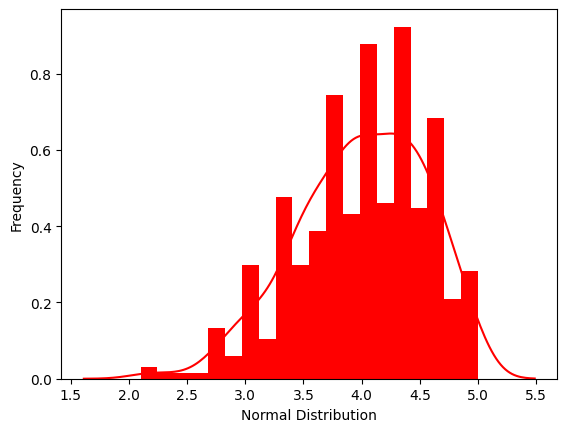

In [5]:
ax = sns.distplot(df['eval'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

In [6]:
f_df = df[df['gender'] == 'female']
m_df = df[df['gender'] == 'male']

scipy.stats.levene(f_df['eval'], m_df['eval'])

LeveneResult(statistic=np.float64(0.1194317835514822), pvalue=np.float64(0.7298092272287706))

Since pvlue is larger than the significance level, we can not reject the null hypothesis. Therefore we can assume equal variance and go ahead with t-test with equall variance. 

In [7]:
scipy.stats.ttest_ind(f_df['eval'], m_df['eval'])

TtestResult(statistic=np.float64(-3.249937943510772), pvalue=np.float64(0.001238760944952222), df=np.float64(461.0))

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender


### ANOVA: Using the teachers' rating data set, does beauty  score for instructors  differ by age?
First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

*   40 years and younger
*   between 40 and 57 years
*   57 years and older


<Axes: xlabel='age', ylabel='beauty'>

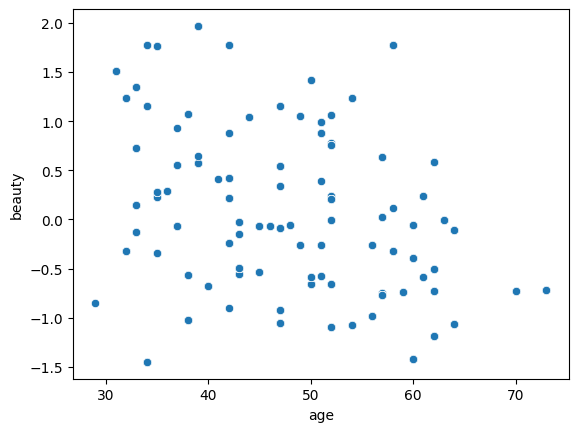

In [8]:
sns.scatterplot(data=df, x="age", y="beauty")

In [9]:
df.loc[df['age']<=40 , 'age_grp'] = 1
df.loc[(df['age'] > 40) & (df['age'] < 57) , 'age_grp'] = 2
df.loc[df['age']>=57 , 'age_grp'] = 3
df.tail()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof,age_grp
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1,1.0
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1,3.0
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1,2.0
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1,1.0
462,no,51,female,more,0.391822,3.0,upper,yes,yes,47,67,69,1,0,1,0,1,1,1,2.0


<Axes: xlabel='age_grp', ylabel='count'>

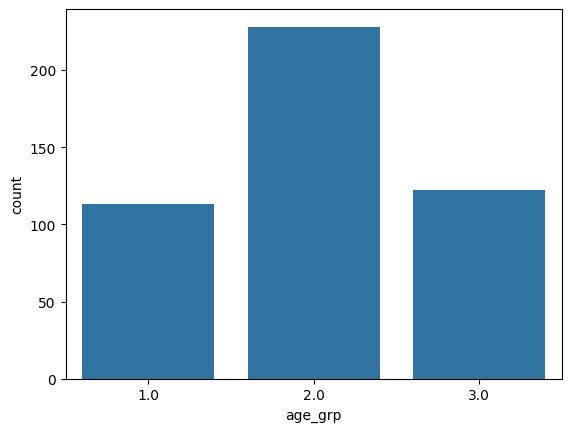

In [10]:
grps = df['age_grp'].value_counts().reset_index()
sns.barplot(data=grps, x='age_grp', y='count')

In [11]:
# Test for equality of variance
scipy.stats.levene(df[df['age_grp'] == 1]['beauty'],
                   df[df['age_grp'] == 2]['beauty'], 
                   df[df['age_grp'] == 3]['beauty'])
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=np.float64(8.347442406311446), pvalue=np.float64(0.00027478194025625424))

Null hypothesis: H0 : mu1 = mu2 = mu3 \
Alternative hypothesis: H1: mu1 != mu2 != mu3

In [12]:
scipy.stats.f_oneway(df[df['age_grp'] == 1]['beauty'], df[df['age_grp'] == 2]['beauty'], df[df['age_grp'] == 3]['beauty'])

F_onewayResult(statistic=np.float64(17.59755861101013), pvalue=np.float64(4.322548981612323e-08))

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### ANOVA: Using the teachers' rating data set, does teaching  evaluation  score for instructors  differ  by age?


<Axes: xlabel='age', ylabel='eval'>

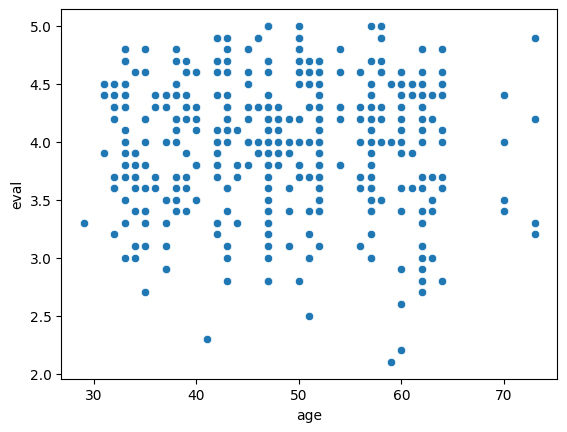

In [13]:
sns.scatterplot(data=df, x='age', y='eval')

In [14]:
grp = df.groupby('age_grp').agg({'eval':'mean'}).reset_index()
grp.columns = ['age_grp', 'mean_eval']
grp

,age_grp,mean_eval
0,1.0,4.002655
1,2.0,4.030702
2,3.0,3.933607


<Axes: xlabel='age_grp', ylabel='mean_eval'>

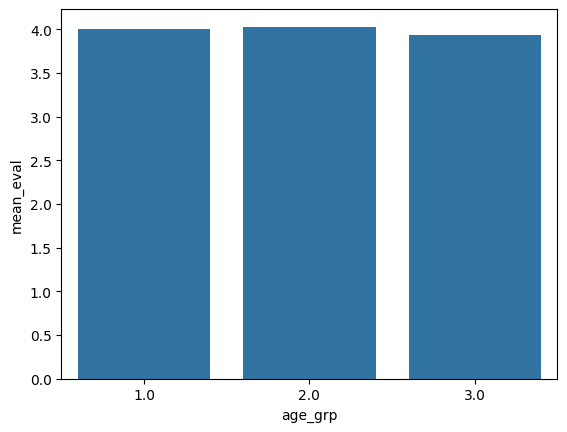

In [15]:
sns.barplot(data=grp, x='age_grp', y='mean_eval')

Null hypothesis: H0: mu1 = mu2 = mu3 \
Alternative hypothesis: H1: mu1 != mu2 != mu3

In [16]:
scipy.stats.f_oneway(df[df['age_grp']==1]['eval'], df[df['age_grp']==2]['eval'], df[df['age_grp']==3]['eval'])

F_onewayResult(statistic=np.float64(1.222632799657221), pvalue=np.float64(0.29540894225407605))

**Conclusion:** Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.


### Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?


State the hypothesis:

*   $H\_0:$ The proportion of teachers who are tenured is independent of gender
*   $H\_1:$ The proportion of teachers who are tenured is associated with gender


In [18]:
cont_table  = pd.crosstab(df['tenure'], df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [19]:
scipy.stats.chi2_contingency(cont_table, correction = False)

Chi2ContingencyResult(statistic=np.float64(2.557051129789522), pvalue=np.float64(0.10980322511302859), dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

**Conclusion:** Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that teachers are tenured as a result of gender.

### Correlation: Using the teachers rating dataset, Is teaching  evaluation  score correlated with  beauty score?
State the hypothesis:

*   $H\_0:$ Teaching evaluation score is not correlated with beauty score
*   $H\_1:$ Teaching evaluation score is correlated with beauty score
Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


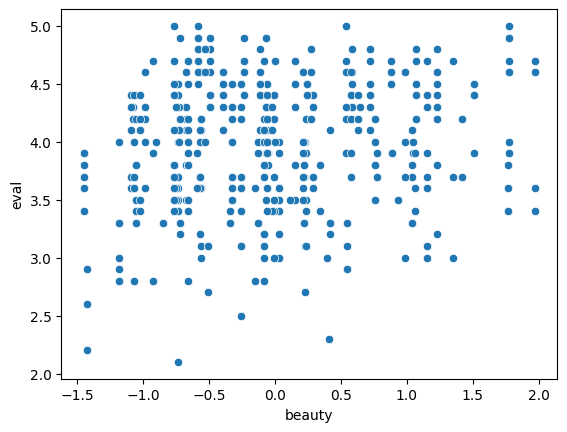

In [21]:
ax = sns.scatterplot(x="beauty", y="eval", data=df)

In [22]:
scipy.stats.pearsonr(df['beauty'], df['eval'])

PearsonRResult(statistic=np.float64(0.18903909084045212), pvalue=np.float64(4.2471154198135855e-05))

### Question 1: Using the teachers rating data set, does tenure affect teaching evaluation scores?

*   Use α = 0.05

In [23]:
df.groupby('tenure').agg({'eval':'mean'}).reset_index()

,tenure,eval
0,no,4.133333
1,yes,3.960111


In [25]:
# H0: mu1 = mu2
# H1: mu1 != mu2

# Can we assume same variance?
scipy.stats.levene(df[df['tenure']=="yes"]['eval'], df[df['tenure']=="no"]['eval'])
# **Conclusion:** We can not reject the null hypothesis and therefore we can assume same variances for the two groups. 

LeveneResult(statistic=np.float64(0.5183794838848778), pvalue=np.float64(0.47189863604808546))

In [26]:
# Now lets do the t-test on the means
scipy.stats.ttest_ind(df[df['tenure']=="yes"]['eval'], df[df['tenure']=="no"]['eval'], equal_var = True)
# **Conclusion:** So we reject the null hypothesis ain the favore of the alternative hypothesis. so being tenured affect the evaluation score

TtestResult(statistic=np.float64(-2.8046798258451777), pvalue=np.float64(0.005249471210198794), df=np.float64(461.0))

### Question 2: Using the teachers rating data set, is there an association between age and tenure?

*   Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
*   What is your conclusion at α = 0.01 and α = 0.05?

In [27]:
grp = df.groupby(['tenure', 'age_grp']).size().reset_index()
grp.columns = ['tenure', 'age_grp', 'count']
grp

,tenure,age_grp,count
0,no,1.0,15
1,no,2.0,62
2,no,3.0,25
3,yes,1.0,98
4,yes,2.0,166
5,yes,3.0,97


<Axes: xlabel='age_grp', ylabel='count'>

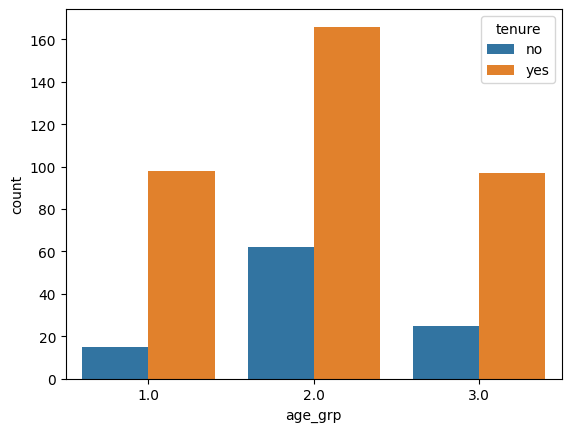

In [28]:
sns.barplot(data = grp, x = 'age_grp', y = 'count', hue='tenure')

In [29]:
ctab = pd.crosstab(df['age_grp'], df['tenure'])
ctab

tenure,no,yes
age_grp,,
1.0,15,98
2.0,62,166
3.0,25,97


In [30]:
# H0 there is no association between gender and tenure
# H1 There is association
scipy.stats.chi2_contingency(ctab, correction=False)

#For alpha = 0.05, we can reject the null hypothesis !

Chi2ContingencyResult(statistic=np.float64(8.749576239010711), pvalue=np.float64(0.012590809706820843), dof=2, expected_freq=array([[ 24.89416847,  88.10583153],
       [ 50.22894168, 177.77105832],
       [ 26.87688985,  95.12311015]]))

### Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors

*   Use α = 0.05

In [31]:
scipy.stats.levene(df[df['tenure']=="yes"]['beauty'], df[df['tenure']=="no"]['beauty'] )
#we can not reject the null hypothesis, so we can assume the same variance

LeveneResult(statistic=np.float64(0.5359243990830889), pvalue=np.float64(0.4644987116031851))

### Question 4: Using the teachers rating data set, is there an association between visible minorities and tenure?

*   Use α = 0.05

In [32]:
ctab  = pd.crosstab(df['minority'], df['tenure'])
ctab

tenure,no,yes
minority,,
no,92,307
yes,10,54


In [34]:
scipy.stats.chi2_contingency(ctab)
# Since the p-value is greater than 0.05, we fail to reject null hypothesis as there is no evidence of an association between visible minorities and tenure

Chi2ContingencyResult(statistic=np.float64(1.3675127484429763), pvalue=np.float64(0.2422396880023718), dof=1, expected_freq=array([[ 87.90064795, 311.09935205],
       [ 14.09935205,  49.90064795]]))